# Fifa19 Exercise - Solutions

Welcome to a quick exercise for you to practice your pandas skills! We will be using the [Fifa19 Dataset](https://www.kaggle.com/winterbreeze/fifa19eda) from Kaggle! Just follow along and complete the tasks outlined in bold below. The tasks will get harder and harder as you go along.

**Import pandas as pd.**

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

#### Read fifa_eda.csv 

In [5]:
df = pd.read_csv('fifa_eda.csv')

In [3]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


### New Part Visualiztion Questions

#### Draw the outliers of players value

<AxesSubplot:xlabel='Value'>

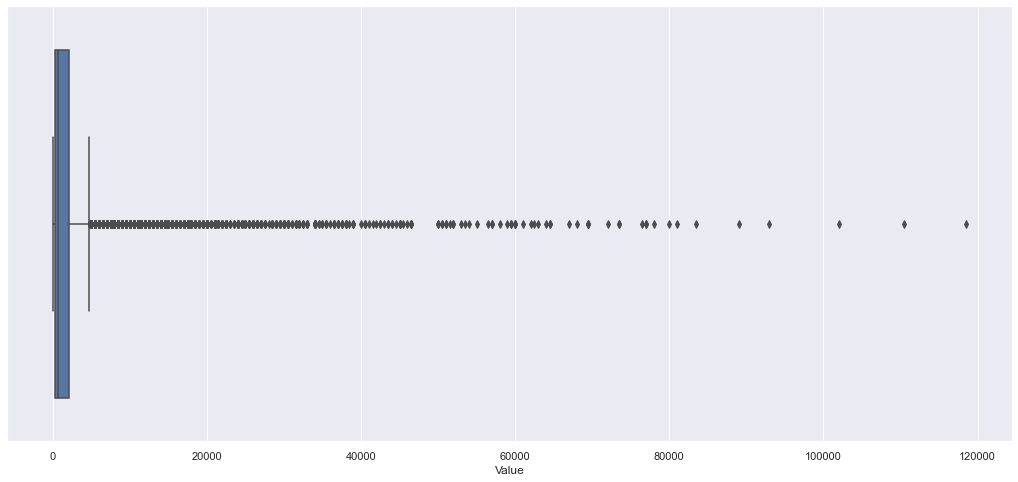

In [93]:
sns.set(rc = {'figure.figsize':(18,8)})

sns.boxplot(data = df , x ='Value')

#### find the average wage for each Nationality and draw the outliers in value for the top 5 nationality

In [86]:
df.groupby('Nationality').mean()['Value'].sort_values(ascending= False)

Nationality
United Arab Emirates    10500.000000
Dominican Republic      10400.000000
Central African Rep.    10050.000000
Egypt                    6658.750000
Gabon                    6628.333333
                            ...     
Indonesia                 180.000000
Botswana                  160.000000
Hong Kong                 145.000000
Puerto Rico               110.000000
India                            NaN
Name: Value, Length: 164, dtype: float64

In [87]:
top_5_age_nati_index = df.groupby('Nationality').mean()['Value'].sort_values(ascending= False).head().index

In [88]:
top_5_age_nati_data = df[df['Nationality'].isin(top_5_age_nati_index)]

<AxesSubplot:xlabel='Nationality', ylabel='Value'>

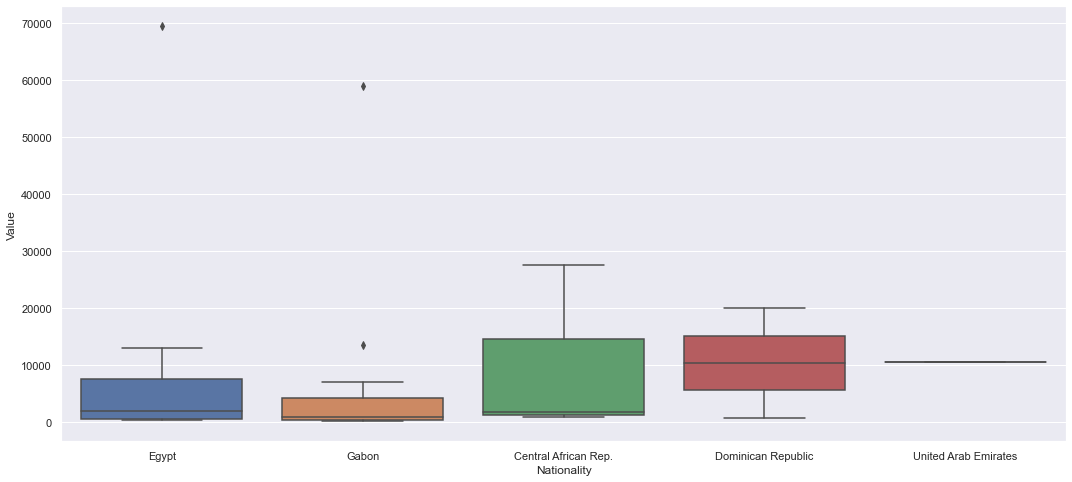

In [89]:
sns.boxplot(data = top_5_age_nati_data , x ='Nationality' , y = 'Value')

In [81]:
top_5_age_nati_data.groupby('Nationality').mean()['Age']

Nationality
Ethiopia             32.00
Kuwait               31.00
Oman                 36.00
Puerto Rico          34.00
Trinidad & Tobago    31.75
Name: Age, dtype: float64

#### Draw the distripution of players Height

<AxesSubplot:xlabel='Height', ylabel='Density'>

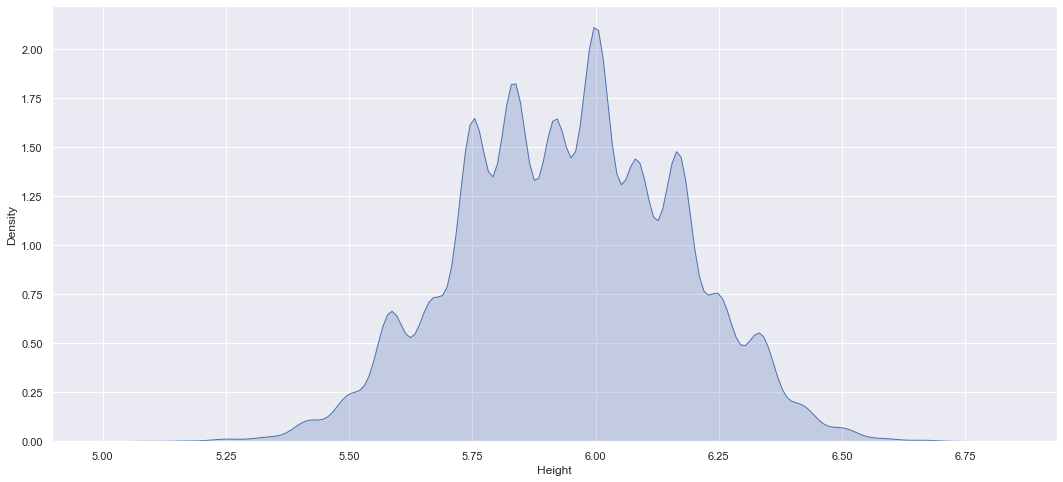

In [49]:
sns.kdeplot(data = df , x ='Height' , shade =True)

#### What are the top 10 clubs in the wage and visualize the results ?

In [59]:
df.groupby('Club').sum().sort_values(by = 'Wage',ascending = False)['Wage'].head(10)

Club
Real Madrid          5017.0
FC Barcelona         4837.0
Manchester City      3741.0
Manchester United    3391.0
Juventus             3292.0
Chelsea              3249.0
Liverpool            2902.0
Tottenham Hotspur    2623.0
Arsenal              2588.0
FC Bayern München    2286.0
Name: Wage, dtype: float64

In [60]:
top_10_wages_index = df.groupby('Club').sum().sort_values(by = 'Wage',ascending = False)['Wage'].head(10).index

In [61]:
top_10_wages_data = df[df['Club'].isin(top_10_wages_index)]

<AxesSubplot:xlabel='Club', ylabel='Wage'>

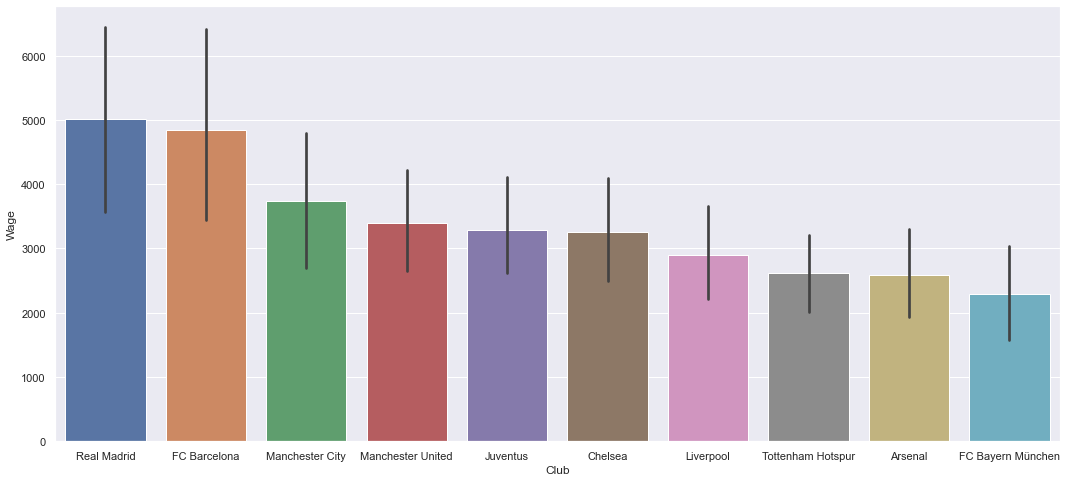

In [63]:
sns.barplot(data = top_10_wages_data , x = 'Club' , y ='Wage' , estimator=sum , order=top_10_wages_index)

#### is there any outlier in the Age find it with 1- visualization 2-  with pandas ?

<AxesSubplot:xlabel='Age'>

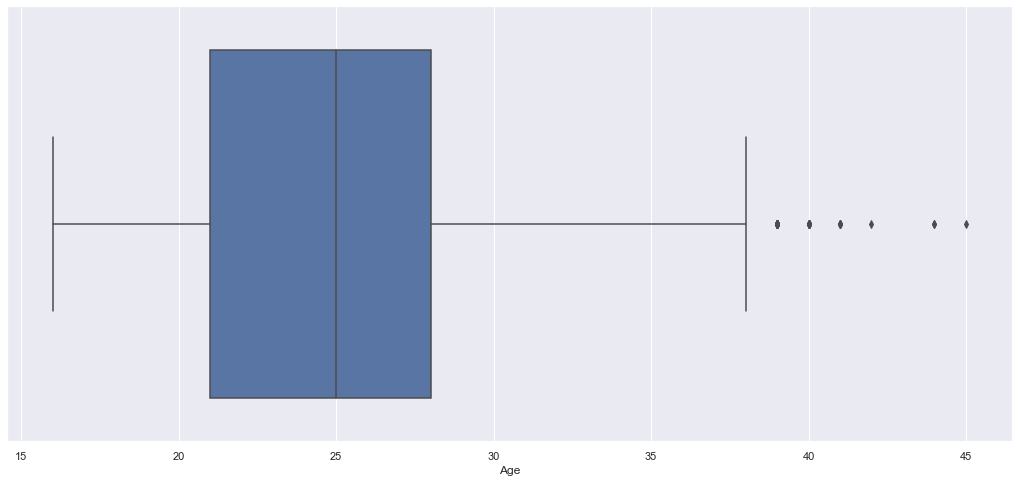

In [35]:
sns.boxplot(data = df , x ='Age')

In [41]:
Q1 = df['Age'].quantile(0.25)

In [42]:
Q3 = df['Age'].quantile(0.75)

In [43]:
IQR = Q3 - Q1

In [44]:
Max_Whisker = Q3 + (1.5 * IQR)

In [45]:
Min_Whisker = Q1 - (1.5 * IQR)

In [47]:
df[(df['Age']  > Max_Whisker ) | (df['Age'] < Min_Whisker)]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
41,1179,G. Buffon,40,Italy,88,88,Paris Saint-Germain,4000.0,77.0,Right,4.0,1.0,GK,2018,2019-01-01,6.333333,203.0,7400.000000
554,49031,S. Sorrentino,39,Italy,80,80,Chievo Verona,1000.0,10.0,Right,2.0,1.0,GK,2016,2022-01-01,6.083333,187.0,1700.000000
864,153260,Hilton,40,Brazil,78,78,Montpellier HSC,NaN,18.0,Right,2.0,3.0,CB,2011,2019-01-01,5.916667,172.0,4585.060806
1120,156092,J. Villar,41,Paraguay,77,77,NaN,NaN,0.0,Right,2.0,1.0,GK,2016,NaN,5.916667,187.0,4585.060806
1294,14907,A. Bizzarri,40,Argentina,76,76,Foggia,525.0,2.0,Right,2.0,1.0,GK,2018,2019-01-01,6.166667,196.0,840.000000
1952,161468,P. Guiñazú,39,Argentina,75,75,Club Atlético Talleres,450.0,10.0,Left,1.0,3.0,LCM,2016,2019-01-01,5.750000,150.0,675.000000
2225,25420,C. Pizarro,39,Peru,74,74,SV Werder Bremen,1600.0,18.0,Right,3.0,4.0,ST,2018,2019-01-01,6.000000,185.0,2800.000000
2706,110638,Cifuentes,39,Spain,73,73,Cádiz CF,270.0,4.0,Right,1.0,1.0,GK,2015,2019-01-01,6.250000,172.0,432.000000
2821,232543,S. Bertoli,40,Argentina,73,73,Patronato,270.0,6.0,Right,1.0,1.0,GK,2003,2019-01-01,6.083333,179.0,392.000000
3128,7647,D. Dainelli,39,Italy,73,73,Livorno,270.0,2.0,Right,2.0,2.0,CB,2018,2019-01-01,6.250000,172.0,419.000000


#### Is there a correlation between Value and Overall and viusalize the results with two graphs?**

In [32]:
df[['Value','Overall']].corr()

,Value,Overall
Value,1.000000,0.631848
Overall,0.631848,1.000000


<AxesSubplot:xlabel='Value', ylabel='Overall'>

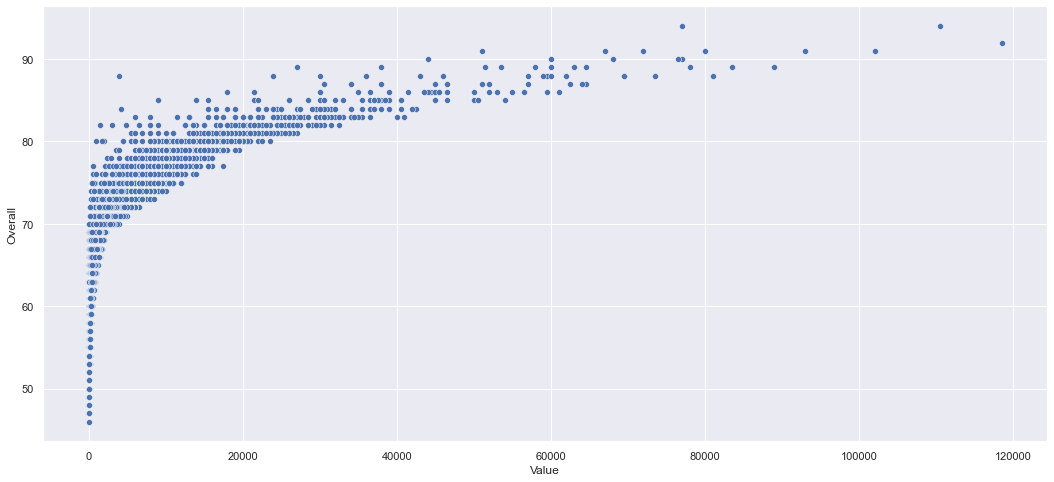

In [31]:
sns.scatterplot(data = df , x = 'Value' , y ='Overall')

<AxesSubplot:>

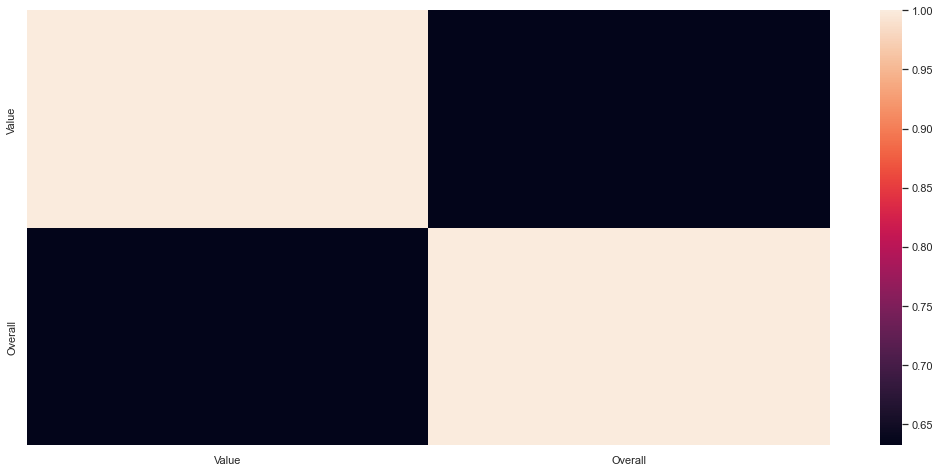

In [33]:
sns.heatmap(df[['Value','Overall']].corr())

#### what are the ratio of the Preferred Foot and visualize with a graph ?

In [4]:
df['Preferred Foot'].value_counts()

Right    13996
Left      4211
Name: Preferred Foot, dtype: int64

<AxesSubplot:xlabel='Preferred Foot', ylabel='count'>

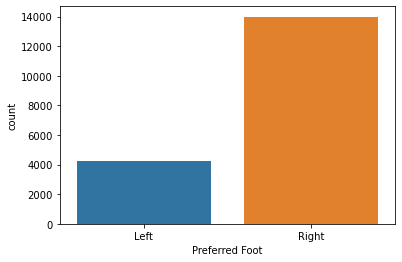

In [5]:
sns.countplot(data = df , x ='Preferred Foot')

#### what are the top 10 average overall clubs and visualize with a graph ?

In [6]:
df.groupby('Club')['Overall'].mean().sort_values(ascending = False).head(10)

Club
Juventus               82.280000
Napoli                 80.000000
Inter                  79.750000
Real Madrid            78.242424
Milan                  78.074074
FC Barcelona           78.030303
Paris Saint-Germain    77.433333
Roma                   77.423077
Manchester United      77.242424
FC Bayern München      77.000000
Name: Overall, dtype: float64

In [17]:
top_10_clubs_indexes = df.groupby('Club').mean()['Overall'].sort_values(ascending = False).head(10).index

In [19]:
top_10_clubs_data = df[df['Club'].isin(top_10_clubs_indexes)]

<AxesSubplot:xlabel='Club', ylabel='Overall'>

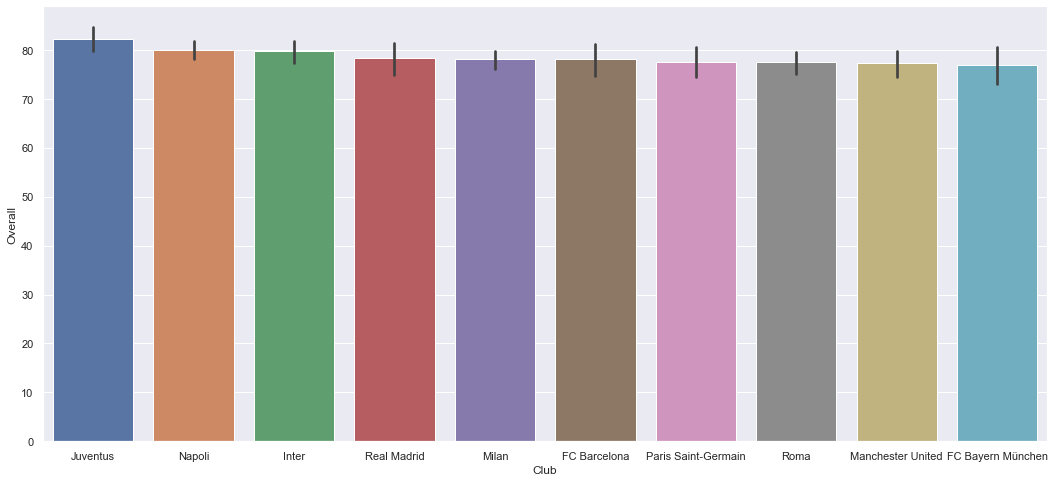

In [64]:
sns.set(rc = {'figure.figsize':(18,8)})

sns.barplot(data = top_10_clubs_data ,x  = 'Club' , y='Overall', order=top_10_clubs_indexes)

**What are the top 5 most common nationality and visualize them with a graph?**

In [8]:
top_nationality_index = df['Nationality'].value_counts().head().index

In [9]:
top_nationality_data = df[df['Nationality'].isin(top_nationality_index) ]

<AxesSubplot:xlabel='Nationality', ylabel='count'>

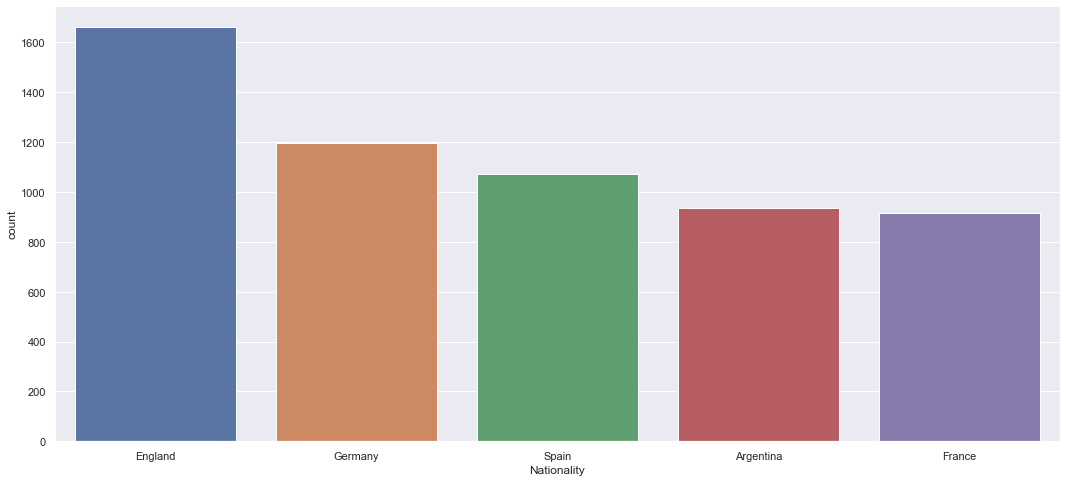

In [65]:
sns.countplot(data = top_nationality_data , x ='Nationality' ,order=top_nationality_index)

# Great Job!